# Assignment 2

**name:** Abdifataah Abdillahi Ali

**email:** aa226wu@student.lnu.se

In this Assignment, you will use Python to handle several exercises related to gradient descent, linear regression, logistic regression, etc.
All exercises are individual. 
We expect you to submit a Jupyter Notebook (i.e., pre-organized and provided through Moodle) and the .py files with the classes’ exercise implementations. 
Your submission should include all the datasets and files we need to run your programs (we will run your notebook). 
When grading your assignments, we will, in addition to functionality, also take into account code quality. 
We expect well-structured and efficient solutions.

In this assignment, you must implement all models as subclasses of MachineLearning-
Model. 
Since the class MachineLearningModel provides the abstract methods fit, predict,
and evaluate, your implementations should provide implementations for such methods.
Please check the documentation of MachineLearningModel to understand what these methods
should do, as well as what their input parameters are and what they should return as results.
You must also implement the classes DecisionBoundary, ROCAnalysis, and ForwardSelection
provided to you. 
Please check their documentation to understand what these methods
should do, what their input parameters are, and what they should return as results. All your
implementations of such classes will be used throughout this assignment.

## Lecture 2 - Linear and Polynomial Regression

### Guidelines for model implementation (Mandatory)

1. Implement a class **RegressionModelNormalEquation** that implements the abstract
class **MachineLearningModel**. All methods should be implemented and properly documented.
This class must work for polynomials of any degree (i.e., an input parameter that
must be captured in the class constructor).

2. Implement a class **RegressionModelGradientDescent** that implements the abstract
class **MachineLearningModel**. All methods should be implemented and properly documented.
This class must work for polynomials of any degree and receive other parameters
such as the learning rate and number of iterations.

3. Both implementations should be vectorized. When implementing these classes, your
vector β should start with all values as 0. In implementing the fit() method, ensure
you track how the cost function evolved over the number of iterations (i.e., store it in an
array you can retrieve after the model is built). This will be needed later in the assignment.

### Validation of your model implementation (1-4 Mandatory, 5-6 Non-mandatory)

1. **(Mandatory)** In this part, you will use a reduced version of the Boston Housing Dataset (housingboston.csv). We will use the first two input variables as the features in this part of the assignment. The last variable is the value to predict.
* **INDUS:** proportion of nonretail business acres per town.
* **RM:** average number of rooms per dwelling.
* **MEDV:** Median value of owner-occupied homes in $1,000s.

Read the dataset and store the values as vectors in the variables $X_e$ and $y$. For this part of the assignment, the degree of the polynomial for your models must be 1.

In [1]:
import numpy as np

# load data
df = np.genfromtxt("datasets/housing-boston.csv",
                    delimiter=",", autostrip=True, skip_header=1, dtype=float)
# target_col = "MEDV" if "MEDV" in df.column else "PRICE"
X = df[:, :2]
y = df[:, 2]


#checking
print("X shape:", X.shape)
print("y shape:", y.shape)

degree = 1 

X shape: (506, 2)
y shape: (506,)


2. **(Mandatory)** Plot the dataset. You must plot two figures side by side (e g., use the subplot method), with the predicted value as the $y-axis$ and each variable on the $x-axis$. 

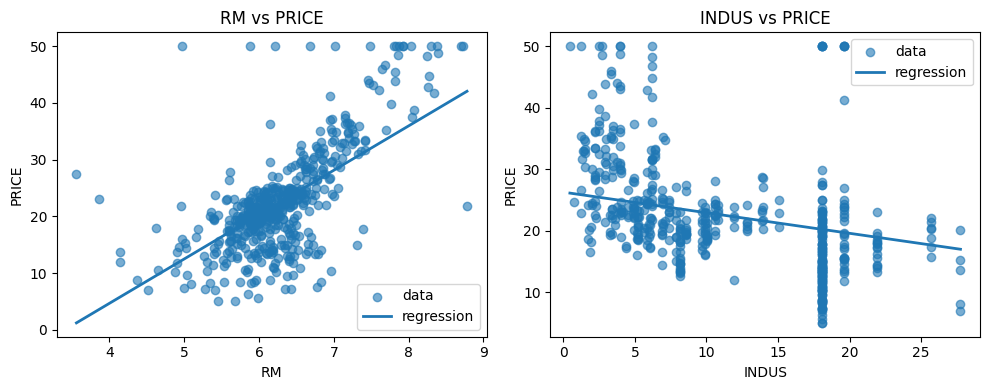

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lecture2.RegressionModelNormalEquation import RegressionModelNormalEquation

# load data
df = np.genfromtxt("datasets/housing-boston.csv",
                    delimiter=",", autostrip=True, skip_header=1, dtype=float)
X = df[:, :2]
y = df[:, 2]

# train on deg = 1 on raw features
model_raw = RegressionModelNormalEquation(degree=1).fit(X, y)

# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# RM v PRICE
indus_values = df[:, 0]
rm_values = df[:, 1]
y_values = df[:, 2]
rm_grid = np.linspace(rm_values.min(), rm_values.max(), 100)
indus_mean = indus_values.mean() * np.ones_like(rm_grid)
axes[0].scatter(rm_values, y, alpha=0.6, label="data")
model_raw = RegressionModelNormalEquation(degree=1)
model_raw.fit(X, y)

axes[0].plot(rm_grid,
             model_raw.predict(np.c_[indus_mean, rm_grid]),
             label="regression", linewidth=2)
axes[0].set_xlabel("RM"); axes[0].set_ylabel("PRICE"); axes[0].set_title("RM vs PRICE")
axes[0].legend()

# INDUS vs PRICE
indus_grid = np.linspace(indus_values.min(), indus_values.max(), 100)
rm_mean = rm_values.mean() * np.ones_like(indus_grid)
axes[1].scatter(indus_values, y, alpha=0.6, label="data")
axes[1].plot(indus_grid,
             model_raw.predict(np.c_[indus_grid, rm_mean]),
             label="regression", linewidth=2)
axes[1].set_xlabel("INDUS"); axes[1].set_ylabel("PRICE"); axes[1].set_title("INDUS vs PRICE")
axes[1].legend()

plt.tight_layout(); plt.show()




3. **(Mandatory)** Use your implementation of the regression model with the normal equation (RegressionModelNormalEquation) and report:

Result:

* The values for $\beta$: $\beta_0=-22.90,\; \beta_{\text{INDUS}}=-0.335,\; \beta_{\text{RM}}=7.822$
* The cost: 39.15(k$)²
* The predicted value for an instance with values for INDUS and TAX equals to $,$, respectively: **\$27.76 k**


In [3]:
from lecture2.RegressionModelNormalEquation import RegressionModelNormalEquation

model = RegressionModelNormalEquation(degree=1)
model.fit(X, y)

print("beta:", model.get_params())
print("MSE:", model.evaluate(X, y))

indus_val, rm_val = 2.31, 6.575
print(f"Predicted PRICE at INDUS={indus_val}, RM={rm_val}:",
      model.predict([[indus_val, rm_val]])[0])

beta: [-22.89831573  -0.33471389   7.82205511]
MSE: 39.1454832114651
Predicted PRICE at INDUS=2.31, RM=6.575: 27.75850754879831


4. **(Mandatory)** Now, normalize the input features, run the regression model with the normal equation, and report the same items. 
The predicted values for this experiment should be the same, but the $\beta$ values change. Why?

---- Your answers here ----

In [4]:
from lecture2.RegressionModelNormalEquation import RegressionModelNormalEquation
# normalise
X_mu, X_sigma = X.mean(axis=0), X.std(axis=0, ddof=0)
X = (X - X_mu) / X_sigma          

model = RegressionModelNormalEquation(degree=1)
model.fit(X, y)

print("beta :", model.get_params())
print("MSE:", model.get_cost_history()[0])

x_instance_norm = (np.array([[indus_val, rm_val]]) - X_mu) / X_sigma
print(f"Predicted PRICE at INDUS={indus_val}, RM={rm_val}:",
      model.predict(x_instance_norm)[0])

print("\nβ changed because it now corresponds to standardised variables, "
      "but the prediction and cost stay identical after we scale the "
      "input point the same way.")


beta : [22.53280632 -2.29398525  5.49047659]
MSE: 39.145483211465084
Predicted PRICE at INDUS=2.31, RM=6.575: 27.758507548798505

β changed because it now corresponds to standardised variables, but the prediction and cost stay identical after we scale the input point the same way.


5. **(Non-Mandatory)** Now, you will work with your implementation of the gradient descent for any degree polynomial. In this part, you must compare how the cost function evolves by using your model using a non-normalized and a normalized instance of your RegressionModelGradientDescen class. 
    * You must plot two figures (e.g., use subplots) side by side to show how the cost evolves over 3000 iterations with a learning rate of $0.001$ using and not using feature normalization. 
    * Describe what is happening and why this happens (i.e., using or not normalization).        
    

---- Your answers here ----


In [8]:
#--- Write your code here ---#

6. **(Non-Mandatory)** Finally, find and plot a figure with the hyperparameter's learning rate and the number of iterations (using the normalized version) such that you get within a difference of 1\% of the final cost for the normal equation using this dataset.

--- Your answer here --- 


In [9]:
#--- Write your code here ---#

## Lecture 2 - Testing your Multivariate Regression Model (1-2 Mandatory, 3 Non-mandatory)

In this exercise, we will use the file secret_polynomial.csv. The data consists of 400 x, y points generated from a polynomial with some Gaussian noise added.

1. **(Mandatory)** Start by creating a procedure to split the dataset into training and test sets. The proportion must be 80% for training and 20% for testing. Show your procedure working by plotting a figure with 3 subplots. The first plot must be the dataset with all data. The second must be the training set and the third the test set. 


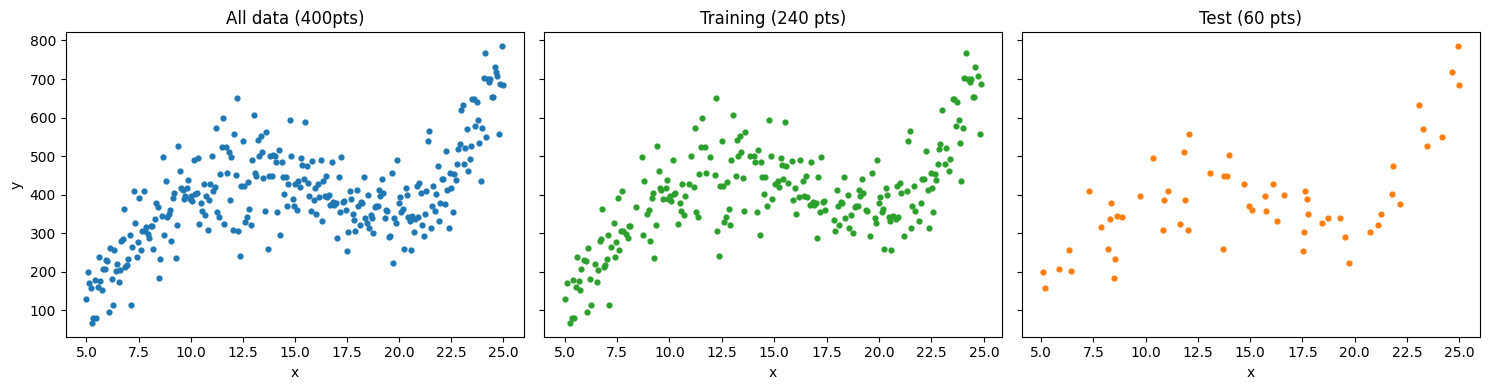

In [10]:
#--- Write your code here ---#
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("datasets/secret_polynomial.csv", delimiter=",", skiprows=1)

x = data[:, 0]
y = data[:, 1]

np.random.seed(42) #reproductibility
perm = np.random.permutation(len(x)) # random shuffle of indicies

cuts = int(0.8 * len(x))  # 80% split point
train_idx, test_idx = perm[:cuts], perm[cuts:]

x_train, y_train = x[train_idx], y[train_idx]
x_tst, y_tst = x[test_idx], y[test_idx]

# plotting 3 subplotts
fig, axes =plt.subplots(1, 3, figsize=(15, 4), sharey=True)

#full dataset
axes[0].scatter(x, y, s=12)
axes[0].set_title("All data (400pts)")
axes[0].set_xlabel("x"); axes[0].set_ylabel("y")

#training set
axes[1].scatter(x_train, y_train, color="tab:green", s=12)
axes[1].set_title(f"Training ({len(train_idx)} pts)")
axes[1].set_xlabel("x")

#test set

axes[2].scatter(x_tst, y_tst, color="tab:orange", s=12)
axes[2].set_title(f"Test ({len(test_idx)} pts)")
axes[2].set_xlabel("x")

plt.tight_layout()
plt.show()


2. **(Mandatory)** Now fit and plot (e.g., using subplots) all polynomial models for degrees $d\in [1,6]$. Observe your figure and decide which degree gives the best fit. Motivate your answer.

--- Your answer here --- 

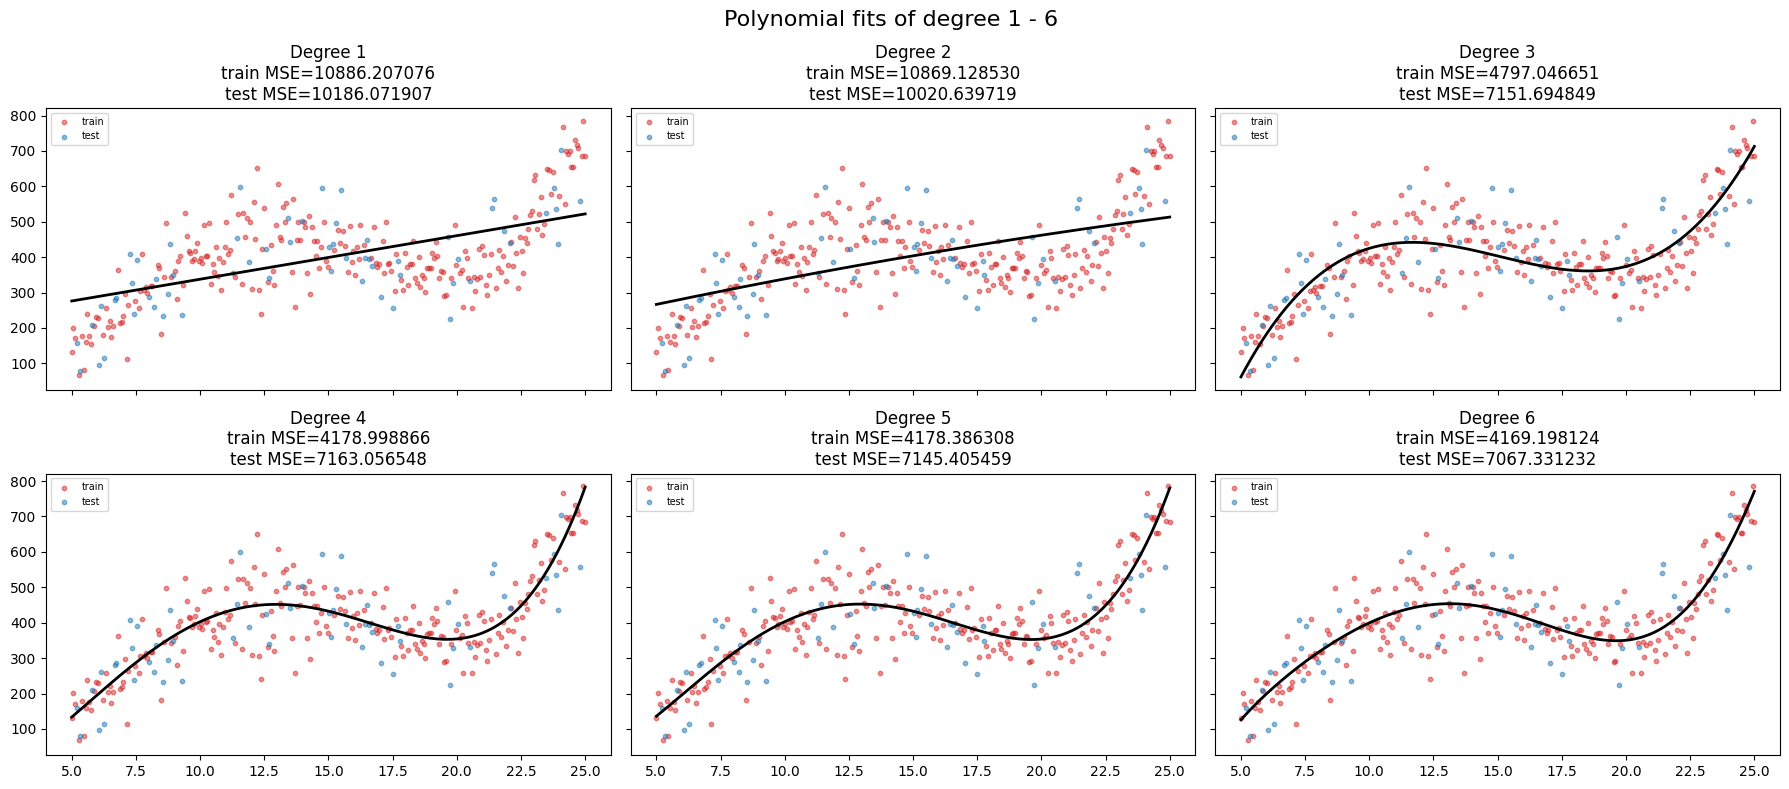

In [11]:
#--- Write your code here ---#
import numpy as np
import matplotlib.pyplot as plt
from lecture2.RegressionModelNormalEquation import RegressionModelNormalEquation

data = np.loadtxt("datasets/secret_polynomial.csv", delimiter=",", skiprows=1)

x = data[:, 0]
y = data[:, 1]
perm = np.random.permutation(len(x)) # random shuffle of indicies

cuts = int(0.8 * len(x))  # 80% split point
train_idx, test_idx = perm[:cuts], perm[cuts:]

x_train, y_train = x[train_idx], y[train_idx]
x_tst, y_tst = x[test_idx], y[test_idx]

deg = range(1, 7)
models = []
train_errors = []
tst_errors = []

for d in deg:
    mdl = RegressionModelNormalEquation(degree=d)
    mdl.fit(x_train.reshape(-1, 1), y_train)
    models.append(mdl)

    train_errors.append(mdl.evaluate(x_train.reshape(-1, 1), y_train))
    tst_errors.append(mdl.evaluate(x_tst.reshape(-1, 1), y_tst))

#plott + fitted edges
x_grid =np.linspace(x.min(), x.max(), 500).reshape(-1, 1)

fig, axes = plt.subplots(2, 3, figsize=(18, 8), sharex=True, sharey=True)
axes = axes.ravel()

for ax, d, mdl, tr_err, te_err in zip(axes, deg, models, train_errors, tst_errors):
    ax.scatter(x_train, y_train, s=10, color="tab:red", alpha=0.5, label="train")
    ax.scatter(x_tst, y_tst, s=10, color="tab:blue", alpha=0.5, label="test")

    ax.plot(x_grid, mdl.predict(x_grid), color="k", linewidth=2)
    ax.set_title(f"Degree {d}\ntrain MSE={tr_err:2f}\ntest MSE={te_err:2f}")
    ax.legend(fontsize="x-small")

plt.suptitle("Polynomial fits of degree 1 - 6 ", fontsize="16")
plt.tight_layout()
plt.show()




3. **(Non-Mandatory)** To increase the confidence of your answer, you must divide the data into training and test sets and make repeated runs with shuffled data (at least 20 runs). You must decide on the best way to make this decision. By using this approach, what is your decision and why? 

--- Your answer here --- 

In [12]:
#--- Write your code here ---#

## Lecture 3 - Logistic Regression

### Guidelines for model implementation (Mandatory)

1. Implement a class LogisticRegressionModel that implements the abstract class MachineLearningModel.
All methods should be implemented and properly documented.
This class receives parameters such as the learning rate and number of iterations. This
class should be implemented in a way that works for two classes only (i.e., 0 or 1).

2. Implement a class NonLinearLogisticRegressionModel that implements the abstract
class MachineLearningModel. All methods should be implemented and properly documented.
This class must work for polynomials of any degree and receive other parameters
such as the learning rate and number of iterations. This class should work for only two
input variables (e.g., X1 and X2, as discussed in class). This class should be implemented
in a way that works for two classes only (i.e., 0 or 1).

3. Both implementations should be vectorized. When implementing these classes, your vector
β should start with all values as 0. In your implementation of the evaluate function, ensure
you keep track of how the cost function evolved over the number of iterations. This will
be needed later in the assignment.

4. Remember that log(0) = undefined. Therefore, you may add a term epsilon = 1e-15 to
prevent this in using the np.log() function. Simply add this term inside the function, and
you will avoid such errors.

### Using your Implementations for the LogisticRegressionModel and the NonLinearLogisticRegressionModel (1-3 Mandatory, 4-6 Non-mandatory)

You will now try to classify bank notes as fake (0) or not (1). This dataset banknote_authentication.csv contains 1372 observations and has 2 features and (in column 3) binary labels of either fake (0) or not (1). Feature data were extracted using a Wavelet Transform tool from images of both fake and non-fake banknotes.

1. **(Mandatory)** Read and normalize the data. Plot the 2 variables in the x and y-axis. Use different colors to plot the classes (i.e., 0 or 1). You should plot two series to obtain this figure.  

In [1]:
#--- Write your code here ---#

2. **(Mandatory)** Separate a validation set with 20\% of the data. We will call the remaining 80\% a sub-dataset.

In [2]:
#--- Write your code here ---#

3. **(Mandatory)** Your task now is to decide on a learning rate and the number of iterations that would work well for your implementations of the LogisticRegression and your NonLinearLogisticRegression. The degree for the NonLinearLogisticRegression model must be 2. Create a figure for each model showing the learning rate and number of iterations and plot the cost function $J(\beta)$ as a function over iterations. This approach must use the sub-dataset (the 80\%) from step 2. Discuss your choice for an appropriate learning rate and the number of iterations.

--- Your answer here --- 



In [3]:
#--- Write your code here ---#

5. **(Non-Mandatory)** Repeat 20 times your experiments (i.e., using different seeds) with the decided learning rate and the number of iterations (step 2) using 20 different sub-datasets generated by your method from step 4. Report as a box-plot all accuracies (i.e., percentage of correct classifications) reported by each model in these 20 runs. Compare and discuss the two models. Are they qualitatively the same? Why?

--- Your answer here --- 

In [4]:
#--- Write your code here ---#

6. **(Non-Mandatory)** Now plot the decision boundary using a similar code to the one provided in class. You must plot the decision boundaries for the normalized data, use both models (LinearLogisticRegression and NonLinearLogisticRegression) and your choice of hyperparameters (step 3), totaling two figures. You must fit your model on the subdataset, but plot the validation dataset only in the figure.  The models that were fit are the ones to be used to create the decision boundary. Report also the accuracies for the two models.  Discuss your results (e.g., similarities, differences, etc) for accuracy and the decision boundary plots.

--- Your answer here --- 

In [5]:
#--- Write your code here ---#

## Lecture 4 - Model Selection and Regularization

### Guidelines for model implementation (Mandatory)

* Implement a class **ROCAnalysis** that calculates the metrics: TP-rate, FP-rate, precision, recall (i.e., same as tp-rate) and f-score.
* Implement a class **ForwardSelection** that implements the feature forward selection algorithm seen in class. This process must use 80% (i.e., fitting the data) of the data for training the models and 20% (i.e., predicting in unseen data) for testing. This method should optimize your problem regarding the TP-rate metric. You must use your implementation of the **ROCAnalysis** class.

For this exercise, you will use the *heart_disease_cleveland.csv* dataset. The dataset contains 13 numerical features, and the last feature is the target variable, which we have to predict. The value of 1 means the patient is suffering from heart disease, and 0 means the patient is normal.

### Using your implementations of ROCAnalysis and ForwardSelection (All Mandatory)

1. **(Mandatory)** Start by normalizing the data and separating a validation set with 20\% of the data randomly selected. The remaining 80\% will be called the sub-dataset.

2. **(Mandatory)** Use your implementation of forward selection to estimate a reasonable classification model. You must use your implementation of Logistic Regression in this assignment. The decision to make a reasonable number of iterations and learning rate is up to you but must be justified. Optimize the model selection to produce the best f-score. You must use the sub-dataset in your forward selection process. Report the features selected by this process and discuss your results. 

--- Your answer here --- 

In [6]:
#--- Write your code here ---#

3. **(Mandatory)** Report the performance of the best model in the validation set regarding all statistics available in your ROCAnalysis class. 
Was the process successful when compared to using all features?  
Discuss your results regarding these metrics and what you can conclude from this experiment.

--- Your answer here --- 

In [7]:
#--- Write your code here ---#

## Lecture 5 - Neural Networks

In this exercise you are allowed to use the scikit-learn package.

**(Mandatory)** First, load the digits dataset using *sklearn.datasets.load_digits*. Split the data into training and test sets (e.g., 80/20 split using train_test_split). Finally, plot 16 random images from the dataset in a 4×4 grid using matplotlib, with their labels displayed.

In [8]:
#--- Write your code here ---#

**(Mandatory)** Use MLPClassifier from *sklearn.neural_network*. 

Train an MLP on the training set and evaluate on the test set.

Then, use cross-validation (e.g., with GridSearchCV or cross_val_score) to explore:

* Number and size of hidden layers

* Activation functions: relu, tanh, logistic

* Learning rate strategies: constant, adaptive

* L2 regularization (alpha)

* Solvers: adam, sgd


Compare different configurations and choose the best-performing model.

Report cross-validation scores and final test accuracy.

--- Your answer here --- 

In [9]:
#--- Write your code here ---#

**(Non-mandatory)**  Plot the confusion matrix for your best model on the test set.

Which digits are often confused?

--- Your answer here --- 


In [10]:
#--- Write your code here ---#

**(Non-Mandatory)** Plot at least 10 misclassified images with predicted and true labels.

Try to identify patterns in the errors (e.g., similar-looking digits).

Are the misclassifications understandable for humans? Why or why not?

--- Your answer here --- 

In [11]:
#--- Write your code here ---#

**(Non-Mandatory)** 

Plot training/validation accuracy or loss over epochs if you're capturing it (using verbose=True or tracking manually).

How quickly does your model reach a stable accuracy or loss?

Is the training accuracy much higher than the validation accuracy?

Does the loss decrease on training but increase on validation?

--- Your answer here --- 

In [12]:
#--- Write your code here ---#